### gradient descent intuition

* reference
    * http://blog.csdn.net/huahuazhu/article/details/73385362

In [28]:
import numpy as np  
from scipy import stats  
import matplotlib.pyplot as plt 
from sklearn import datasets
%matplotlib inline

plt.rcParams['figure.figsize']=[10,6]
import seaborn as sns
sns.set_style('whitegrid')

___

#### simulate y, distributed as y = 2x + 5 + norm_dist (0,1)  
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html

In [29]:
### draw from standard normal distribution
# example
np.random.randn(5)

array([ 0.97873798,  2.2408932 ,  1.86755799, -0.97727788,  0.95008842])

In [30]:
# training data
x = np.arange(0., 10., 0.2)  
m = len(x)  # train length
print m  

# x0 = np.full(x.shape, 1.0)  # create array of 1s with same shape of x

# tmp=np.ones_like(x)
# print np.array_equal(x0, tmp) # another way of doing above


# input_data = np.vstack([x0, x]).T  # insert bias value (intercept) to the first position of the training matrix

# tmp = np.c_[np.ones_like(x),x] # another way of doing above
# print np.array_equal(input_data, tmp)

input_data = x

target_data = 2 * x + 5 + np.random.randn(m) # make y -- target data

50


#### np.full  
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.full.html

In [31]:
np.zeros(2)

array([0., 0.])

In [32]:
print input_data[:3]
input_data.shape

[0.  0.2 0.4]


(50,)

In [33]:
print target_data[:3]
target_data.shape

[4.84864279 5.29678115 6.2105985 ]


(50,)

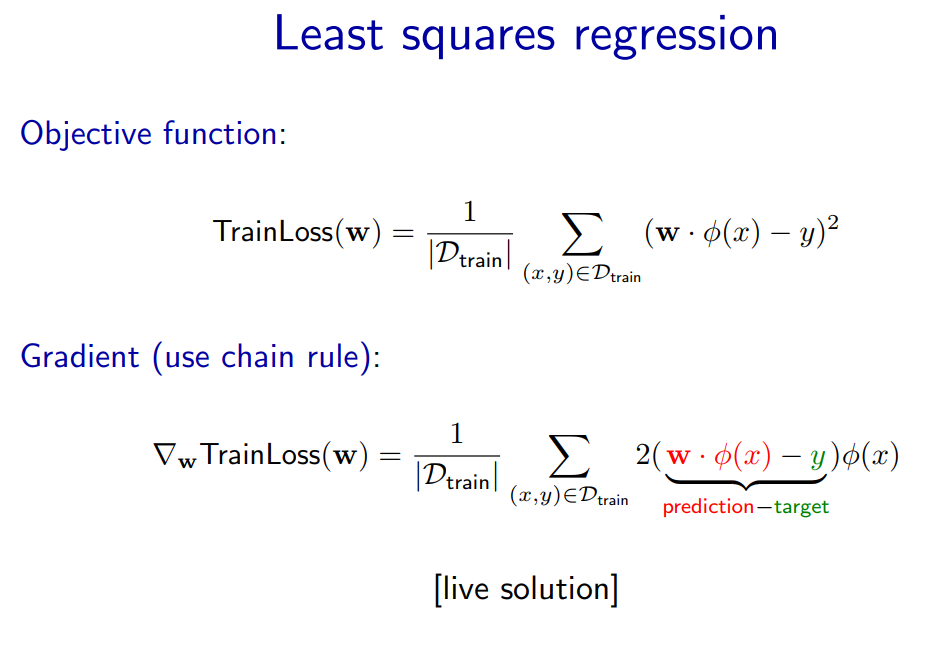
___

___
* loss function: J($\theta$)   
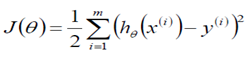  
 

___
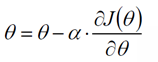  
 

* gradient:  

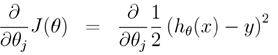  

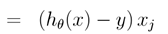  

In [34]:
# termination condition  
loop_max = 10000  # max loop
epsilon = 1e-3  # assume convergence
alpha = 0.001  # learning rate (step length)

In [52]:
    # normalize the shape of training data
    input_data = input_data.reshape(-1,1)  

In [58]:
def batch_gradient(input_data, target_data, alpha = 0.001, loop_max = 1000, epsilon = 1e-3):  
    
    # find training data length, features number
    m, feature_n = input_data.shape
    
    # insert bias value (intercept) to the first position of the training matrix
    input_data = np.c_[np.full(m, 1.0), input_data]

    

    # initialize weights  
    # +1 is because we add intercept to the position 0 
    np.random.seed(0)  
    theta = np.random.randn(feature_n+1)  

    diff = 0.  
    error = np.zeros(feature_n+1)  
    count = 0  # time of loop  
    finish = 0  # termination flag

    while count < loop_max:  
        count += 1  

        # batch gradient descent is to capture errors of the entire training set before update the weights 
        # stochastic gradient descent os just to capture the error of ONE record of the training set before update the weights
        # so for every step(loop) batch gradient descent calculates the error of the entire training set, need more computation


        # loop through every feathure (column) of X, (the first one is intercept) 
        # sum_m save errors of each feature (first one is intercept), e.g. [e0,e1,e2,e3,e4,...]
        # 
        # every loop initialize 0
        sum_m = np.zeros(feature_n+1)  

        # m is number of records of training data
        for i in range(m):  

            # derivative of loss function! 
            # calculate gradient
            # gradient = (h(theta) - y)* Xi
            dif = (np.dot(theta, input_data[i]) - target_data[i]) * input_data[i]  

            # add gradient of record i to sum_m of that loop batch
            sum_m = sum_m + dif  # if alpha is too large, sum_m will overflow while looping

        # update weight with learning rate * batch gradient 
        theta = theta - alpha * sum_m  # if alpha (learning rate) is big, will fluctuate rather than convergence 
        # theta = theta - 0.005 * sum_m      # e.g. alpha=0.05, will fluctuate  

        # check convergence 
        # np.linalg.norm (default) calculate L2-norm, here use to cal MSE
        mse = np.linalg.norm(theta - error)
        if mse < epsilon:  
            finish = 1  
            # break the loop
            break  
        else:
            # update error? with weights
            error = theta 
        if count%20==0 or count==1:
            print 'loop count = %d ' % count, '\t w:', str(map(lambda x: round(x, 4), theta)).ljust(20), '  MSE: ', round(mse,6)

    print 'Final:\nloop count = %d' % count, '\t w:',theta  , 'MSE: ', round(mse,6)
    
    return theta, mse

#### visualize with only 1 feature linear regression

In [54]:
theta, mse = batch_gradient(input_data, target_data)

IndexError: index 506 is out of bounds for axis 0 with size 506

In [55]:
# check with scipy linear regression  
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, target_data)  
print 'intercept = %s slope = %s' % (intercept, slope)  
  
# print with our gradient weights    
plt.plot(x, target_data, 'g*')  
plt.plot(x, theta[1] * x + theta[0], 'r')  
plt.show()  

ValueError: all the input array dimensions except for the concatenation axis must match exactly

___
#### test with complex data
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

(506, 13) (506,)


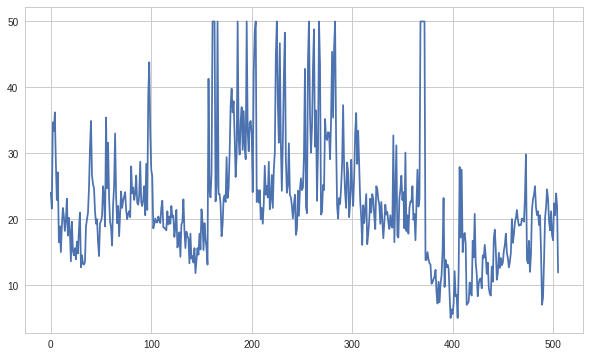

In [38]:
data = datasets.load_boston(return_X_y=True)
X, y = data
print X.shape, y.shape
plt.plot(y)

In [ ]:
# batch_gradient(X, y)

In [66]:
X.shape, y.shape

((506, 13), (506,))

In [59]:
# termination condition  
loop_max = 100  # max loop
epsilon = 1e-3  # assume convergence
alpha = 0.001  # learning rate (step length)

In [67]:
input_data, target_data = X, y


In [68]:
input_data.shape

(506, 13)

In [69]:
input_data, target_data = X, y
# normalize the shape of training data
input_data = input_data.reshape(-1,1)    

# find training data length, features number
m, feature_n = input_data.shape

# insert bias value (intercept) to the first position of the training matrix
input_data = np.c_[np.full(m, 1.0), input_data]



# initialize weights  
# +1 is because we add intercept to the position 0 
np.random.seed(0)  
theta = np.random.randn(feature_n+1)  

diff = 0.  
error = np.zeros(feature_n+1)  
count = 0  # time of loop  
finish = 0  # termination flag

while count < loop_max:  
    count += 1  

    # batch gradient descent is to capture errors of the entire training set before update the weights 
    # stochastic gradient descent os just to capture the error of ONE record of the training set before update the weights
    # so for every step(loop) batch gradient descent calculates the error of the entire training set, need more computation


    # loop through every feathure (column) of X, (the first one is intercept) 
    # sum_m save errors of each feature (first one is intercept), e.g. [e0,e1,e2,e3,e4,...]
    # 
    # every loop initialize 0
    sum_m = np.zeros(feature_n+1)  

    # m is number of records of training data
    for i in range(m):  

        # derivative of loss function! 
        # calculate gradient
        # gradient = (h(theta) - y)* Xi
        dif = (np.dot(theta, input_data[i]) - target_data[i]) * input_data[i]  

        # add gradient of record i to sum_m of that loop batch
        sum_m = sum_m + dif  # if alpha is too large, sum_m will overflow while looping

    # update weight with learning rate * batch gradient 
    theta = theta - alpha * sum_m  # if alpha (learning rate) is big, will fluctuate rather than convergence 
    # theta = theta - 0.005 * sum_m      # e.g. alpha=0.05, will fluctuate  

    # check convergence 
    # np.linalg.norm (default) calculate L2-norm, here use to cal MSE
    mse = np.linalg.norm(theta - error)
    if mse < epsilon:  
        finish = 1  
        # break the loop
        break  
    else:
        # update error? with weights
        error = theta 
    if count%20==0 or count==1:
        print 'loop count = %d ' % count, '\t w:', str(map(lambda x: round(x, 4), theta)).ljust(20), '  MSE: ', round(mse,6)

print 'Final:\nloop count = %d' % count, '\t w:',theta  , 'MSE: ', round(mse,6)


IndexError: index 506 is out of bounds for axis 0 with size 506